# ORIE 4580/5580/5581 Assignment 3

#### Students: Oscar Callamari-Abrams (oc67) and Riley Coogan (rmc329)

### Github link: (https://github.com/OscarC-A/4580-SimModeling)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt, pi, e
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

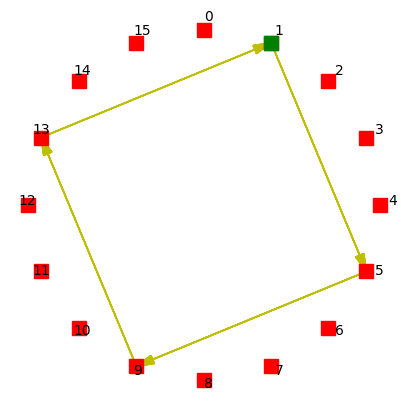

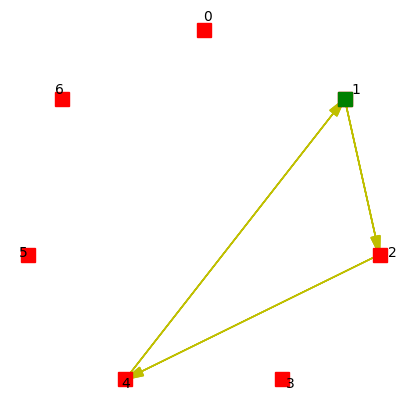

In [ ]:
# Ans
seed = 1
mX = 16
aX = 5
cX = 0

fig = plt.figure(figsize=(5,5))
x = LCG(n=mX+1, m=mX, a=aX, c=cX, seed=seed)
plot_clock_face(mX, fig, annotate=True)
plot_clock_path(mX, x, fig)
plt.axis('off')
plt.show()

mY = 7
aY = 2
cY = 0

fig = plt.figure(figsize=(5,5))
y = LCG(n=mY+1, m=mY, a=aY, c=cY, seed=seed)
plot_clock_face(mY, fig, annotate=True)
plot_clock_path(mY, y, fig)
plt.axis('off')
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

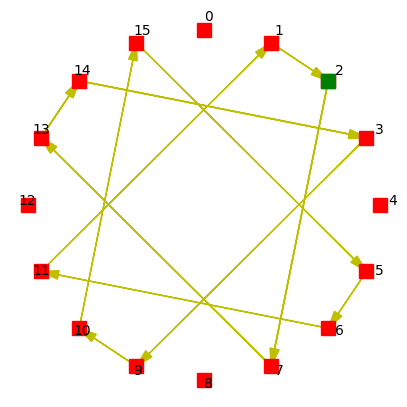

In [ ]:
def LCGZ(n, mX, mY, aX, aY, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    outputX = np.zeros(n)
    outputY = np.zeros(n)
    outputZ = np.zeros(n)

    x = seed
    y = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        outputX[i] = (x + 1.0) / (mX + 1.0)
        outputY[i] = (y + 1.0) / (mY + 1.0)
        outputZ[i] = (x + y + 1.0) / (mX + 1.0)

        # Update the LCG state using the specified parameters
        x = (aX * x + cX) % mX
        y = (aY * y + cY) % mY


    return outputZ

mZ = 16
z = LCGZ(n=mZ+1, mX=mX, mY=mY, aX=aX, aY=aY, seed=seed)

fig = plt.figure(figsize=(5,5))
plot_clock_face(mZ, fig, annotate=True)
plot_clock_path(mZ, z, fig)
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.


For $x_n$:

The period here is 4, with numbers 1, 5, 9, 13.

For $y_n$:

The period here is 3, with numbers 1, 2, 4.

For $z_n$:

The period here is 12 (on the order of $4 \times 3$) with numbers: 2, 7, 13, 14, 3, 9, 10, 15, 5, 6, 11, 1.

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

For each range, we need to find the smallest x such that $F(x) \geq y$.

For the first range y can never be less than 0 so we do not consider it.

For the 2nd range because it is continous and just equal to x we get:

$y \ \ \ \text{  for  } \ 0 ≤ x < \tfrac 12$

For the 3rd, if y = $\tfrac 12$ then x will be $\tfrac 12$ as well, but for anything greater, x will have to be 1 as this is a discrete portion. We will adjust the ranges accordingly.

$\tfrac 12 \ \ \ \text{  for  }  x = \frac 12$

$1 \ \ \ \text{  for  } \ x > \tfrac 12$

All together with our adjusted ranges, we now have:

$F^{-1}(y) = \begin{cases}
y & \text{for } 0 \le y \le \frac{1}{2} \\
1& \text{for } \frac{1}{2} < y \le 1
\end{cases}$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

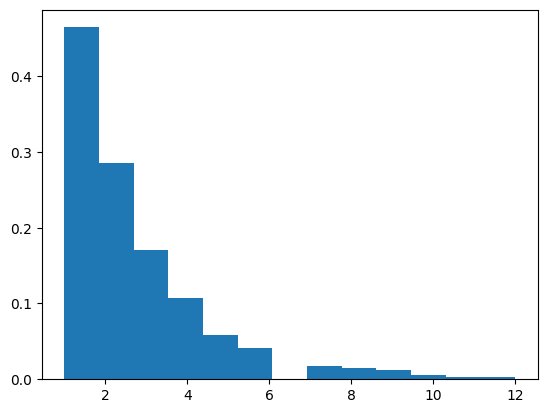

In [4]:
def geom_inv(p, n):
    unif = scipy.stats.uniform.rvs(size=n)
    return scipy.stats.geom.ppf(unif, p)

inv = geom_inv(0.42, 1000)
plt.hist(inv, bins=13, density=True)
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

First we need to integrate the pdf to find the cdf.

For the first range:

$F(x)=∫_0^x​e^{t-2}dt=e^{-2}\int_0^xe^tdt=e^{-2}(e^x-1)$

For the second:

$F(x)=F(2) + ∫_2^xe^{-t}dt = (1-e^{-2}) + (-e^{-x} + e^{-2})=1 - e^{-x}$

So we have: $F(x) =
	\begin{cases}
		e^{-2}(e^x-1) & \text{for }0 \leq x \leq 2, \\
		1 - e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise}
	\end{cases}$

We now must invert it. For the first range of x, the CDF has a range from 0 to $1-e^{-2}$ (inclusive). And its inverse is:

$e^{-2}(e^x-1) = u\\
e^x-1 = e^2u\\
x = \ln (e^2u+1)$

For the second, it has a range from $1-e^{-2} \text{  to  } 1$. Its inverse is:

$1-e^{-x} = u\\
\ln(1-u) = -x\\
x = -\ln(1-u)$

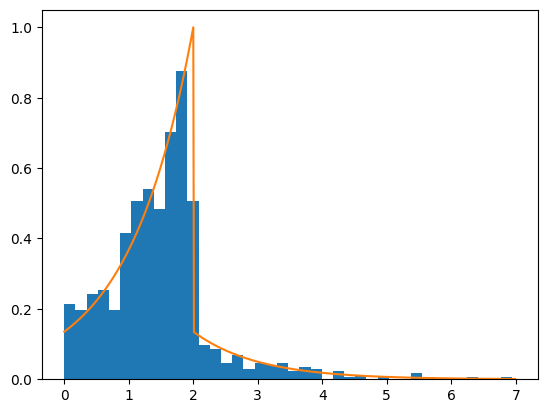

In [10]:
def genX(n):
    unif = scipy.stats.uniform.rvs(size=n)
    x = np.zeros(n)
    for i in range(n):
        if unif[i] <= 1-np.exp(-2):
            x[i] = np.log(np.exp(2)*unif[i]+1)
        else:
            x[i] = -np.log(1-unif[i])
    return x

def pdfX(n, step):
    axis = np.arange(start=0, stop=n, step=step)
    for i in range(len(axis)):
        num = axis[i]
        if num <= 2:
            axis[i] = np.exp(num-2)
        else:
            axis[i] = np.exp(-num)
    return axis

x = genX(1000)
n = 7
step = 0.01
plt.hist(x, bins=40, density=True)
plt.plot(np.arange(start=0,stop=n, step=step), pdfX(n, step))
plt.show()


<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


First, we need to find M, the upper bound of $f(x)$. By simply looking at f(x), we can clearly see that it is strictly increasing for $0 \le x \le 1$ and thus the occurs at x = 1. Plugging in, we get $\frac{5 + 4 + 3 + 1}{4} = \frac{13}{4} = 3.25$

So, we have M = 3.25

In [ ]:
def fx(u):
    return (5 * u**4 + 4*u**3 + 3*u**2+1)/4

def AccRej(n, M):
    unif = scipy.stats.uniform.rvs(size=n)
    v = scipy.stats.uniform.rvs(size=n) * M
    samples = []

    for i in range(len(unif)):
        if v[i] <= fx(unif[i]):
            samples.append(unif[i])
    return samples

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.


We on average will need $1 \ / \ P[\text{Acceptance}]$ trials to generate one sample of X, and each trial consists of 2 samples from the uniform distribution.

The probability of acceptance is the area under f(x) divided by the area M(b-a). The area under an rvs full pdf is always equal to 1, and in this case $M(b-a) = (13/4) / (1-0) = 13/4$

So we then are left with a probability of acceptance of $\frac{1}{13/4} = \frac{4}{13}$ and thus $1 \ / \ P[\text{Acceptance}] = \frac{13}{4}$. And because we use 2 samples per trial, our final answer is $\frac{13}{2}$

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

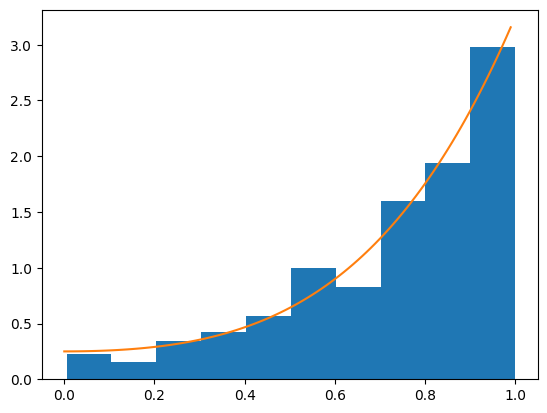

In [ ]:
samples = AccRej(2500, 3.25)

plt.hist(samples, density=True)
plt.plot(np.arange(start=0,stop=1, step=0.01), fx(np.arange(start=0,stop=1, step=0.01)))
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $N(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

First we must find the CDF of Y described by the pdf g(x)

We accomplish this by integrating piecewise over the bounds x$\leq$0 and x$\geq$0

This gives us:


F(x) =
\begin{cases}
\frac{1}{2} e^{x}, & x \leq 0, \\
1 - \tfrac{1}{2} e^{-x}, & x \geq 0.
\end{cases}


Inverting this (setting CDF formula = U~uniform(0,1)) gives

F^{-1}(u) =
\begin{cases}
\ln(2u), & u < \tfrac{1}{2}, \\
-\ln\!\big(2(1-u)\big), & u \geq \tfrac{1}{2}.
\end{cases}


Method:
1. Draw random variable U.  
2. If (U < 0.5), return (X = ln(2U)). Otherwise, return (X = -ln(2(1-U))).

In [12]:


def sample(u):
    return np.where(u < 0.5, np.log(2*u), -np.log(2*(1-u)))

def laplace(n):
    return sample(np.random.rand(n))

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.
First, we need to find k, the value which represents the maximum ratio between f(x) and g(x), as then kg(x)$\geq$ f(x) $\forall$ x.

Since all pdfs have total area under the curve of 1, 1/k will be the probability that we should take the value we generate because we want to emulate a true probability distribution f(x)

Then, we on average will need  1 / P[Acceptance]  trials to generate one sample of X, and each trial consists of 2 samples from the uniform distribution.

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2},
$$

$$
g(x) = \tfrac{1}{2} e^{-|x|}.
$$

We trivially compute the ratio:

$$
\frac{f(x)}{g(x)} = \frac{2}{\sqrt{2\pi}} \, e^{\,|x| - \tfrac{x^2}{2}}.
$$

We see that the ratio is an increasing function of $M= {\,|x| - \tfrac{x^2}{2}}$, so we take the derivative and find that x=$±1$ maximizes the ratio.

Thus:

$$
k = \frac{f(1)}{g(1)}= \sqrt{\frac{2e}{\pi}}
$$


Method:

1. Sample Y ~g using Laplace via inverse CDF (Sample U ~ Unif(0,1)).  
2. Sample U ~ Unif(0,1).  
3. Accept Y if
   $
   U \le \frac{f(Y)}{k g(Y)}.
   $


Expectation

$$
\Pr(\text{accept}) = \frac{1}{k}
$$

Each proposal uses two uniforms (one to generate \(Y\), one for \(U\)). Therefore:

$$
\mathbb{E}[\text{uniforms per accepted sample}] = 2k = 2*\sqrt{\frac{2e}{\pi}}
$$

In [13]:
def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)


def g_lap(x):
    return 0.5*np.exp(-np.abs(x))


# Optimal k
k_lap = sqrt(2*e/pi)


samples_lap = []
uniform_counts_lap = []

while len(samples_lap) < 1000:
    attempts_for_this_one = 0
    while True:
        attempts_for_this_one += 1
        y = laplace(1)[0]            # uniform for proposal
        u = np.random.rand()         # uniform for accept
        if u <= f(y) / (k_lap * g_lap(y)):
            samples_lap.append(y)
            uniform_counts_lap.append(2 * attempts_for_this_one)
            break

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

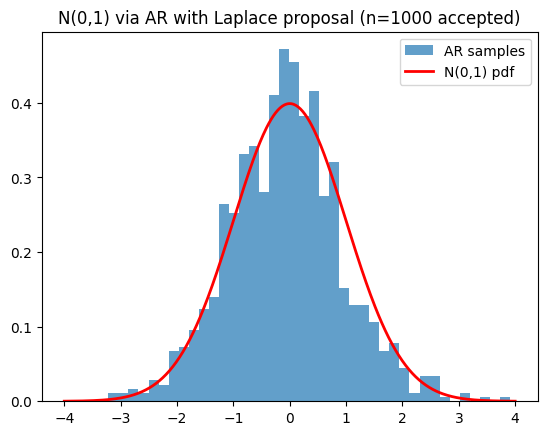

mean U[0,1] per accepted sample: 2.634
95% CI: [ 2.557898685685197 ,  2.710101314314803 ]
Theoretical mean (2k*): 2.630978493917828


In [ ]:
# --- Part (c): AR with Laplace proposal, histogram, mean & 95% CI of U[0,1] usage ---




def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)


def g_lap(x):
    return 0.5*np.exp(-np.abs(x))


# Optimal k
k_lap = sqrt(2*e/pi)


samples_lap = []
uniform_counts_lap = []

while len(samples_lap) < 1000:
    attempts_for_this_one = 0
    while True:
        attempts_for_this_one += 1
        y = laplace(1)[0]            # uniform for proposal
        u = np.random.rand()         # uniform for accept
        if u <= f(y) / (k_lap * g_lap(y)):
            samples_lap.append(y)
            uniform_counts_lap.append(2 * attempts_for_this_one)
            break

samples_lap = np.array(samples_lap[:1000])
uniform_counts_lap = np.array(uniform_counts_lap[:1000])

# Plot histogram vs true normal pdf
plt.hist(samples_lap, bins=40, density=True, alpha=0.7, label="AR samples")
xs = np.linspace(-4, 4, 400)
plt.plot(xs, f(xs), 'r', linewidth=2, label="N(0,1) pdf")
plt.title("N(0,1) via AR with Laplace proposal (n=1000 accepted)")
plt.legend()
plt.show()

# Average & 95% CI for U[0,1] usage per accepted sample
mean_uniforms_lap = uniform_counts_lap.mean()
sd_uniforms_lap = uniform_counts_lap.std(ddof=1)
ci_lap = (
    str(mean_uniforms_lap - 1.96 * sd_uniforms_lap / np.sqrt(1000)),
    str(mean_uniforms_lap + 1.96 * sd_uniforms_lap / np.sqrt(1000)),
)

print("mean U[0,1] per accepted sample:", mean_uniforms_lap)
print("95% CI: [", ci_lap[0], ", ", ci_lap[1],"]")
print("Theoretical mean (2k*):", 2*k_lap)


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

First we must find the CDF of \(Y\) described by the pdf g(x):

$$
g(x) = \frac{1}{\pi(1+x^2)}, \quad x \in \mathbb{R}.
$$

We accomplish this by integrating over the real line:

$$
F(x) = \int_{-\infty}^x \frac{1}{\pi(1+t^2)}\, dt.
$$

Since \(\int \frac{1}{1+t^2} dt = \arctan(t)\), this gives us:

$$
F(x) = \frac{1}{\pi}\left(\arctan(x) + \frac{\pi}{2}\right).
$$



Inverting this (setting \(F(x) = U \sim \text{Uniform}(0,1)\)) gives:

$$
F^{-1}(u) = \tan\!\big(\pi(u - \tfrac{1}{2})\big).
$$



Method:
1. Draw random variable \(U \sim \text{Uniform}(0,1)\).  
2. Return $ X = \tan\!\big(\pi(U - \tfrac{1}{2})\big).
   $

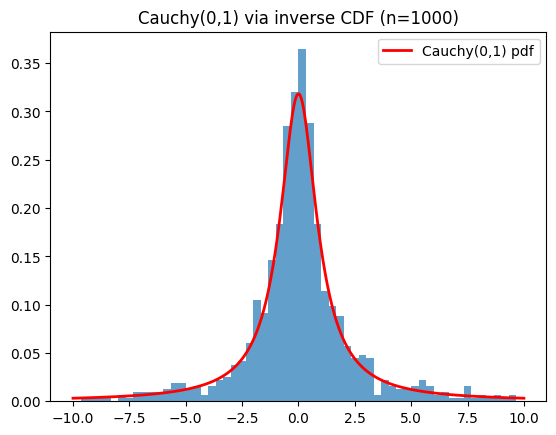

In [ ]:
def cauchy(n):
    u = np.random.rand(n)
    return np.tan(pi*(u - 0.5))

cauchy_samps = cauchy(1000)

plt.hist(cauchy_samps, bins=60, density=True, alpha=0.7, range=(-10, 10))
xs = np.linspace(-10, 10, 400)
plt.plot(xs, 1/(pi*(1+xs**2)), 'r', linewidth=2, label="Cauchy(0,1) pdf")
plt.title("Cauchy(0,1) via inverse CDF (n=1000)")
plt.legend()
plt.show()

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

Given
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2},
\qquad
g(x) = \frac{1}{\pi(1+x^2)}.
$$

We compute the ratio:
$$
\frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^2/2}}{\tfrac{1}{\pi(1+x^2)}}
= \sqrt{\frac{\pi}{2}}\; e^{-x^2/2}\,(1+x^2).
$$

We see that the ratio is an increasing function of
$$
H(x)= e^{-x^2/2}(1+x^2).
$$
Differentiate \(H\):
$$
H'(x) = e^{-x^2/2}\,x(1 - x^2).
$$
Critical points at $x=0,\pm 1$. Evaluate:
$$
H(0)=1,\qquad H(1)=\frac{2}{\sqrt{e}}.
$$
Thus the maximum occurs at \(|x|=1\).

Therefore:
$$
k
= \frac{f(1)}{g(1)}
= \sqrt{\frac{\pi}{2}}\cdot \frac{2}{\sqrt{e}}
= \sqrt{\frac{2\pi}{e}}.
$$

Method:
1. Sample Y ~ g using Cauchy inverse CDF: draw U ~ Unif(0,1), set Y=$\tan\!\big(\pi(U-\tfrac12)\big)$
2. Sample U ~ Unif(0,1)
3. Accept Y if
   $$
   U \le \frac{f(Y)}{k*g(Y)}.
   $$

Expectation:
$$
\Pr(\text{accept}) = \frac{1}{k}.
$$

Each proposal uses two uniforms (one to generate \(Y\), one for the accept step). Therefore:
$$
\mathbb{E}[\text{uniforms per accepted sample}] = 2k \;=\; 2\sqrt{\frac{2\pi}{e}}.
$$

### Ans.

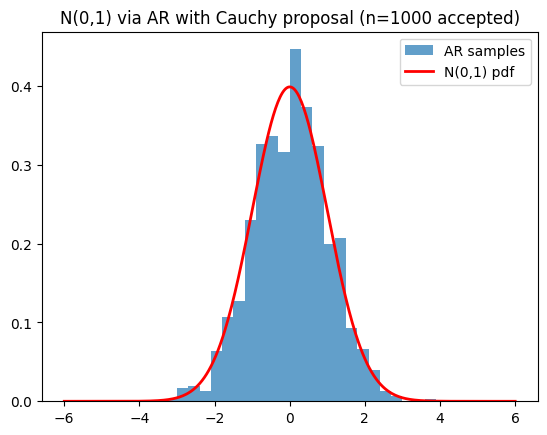

mean U[0,1] per accepted sample: 3.094
95% CI: [ 2.9792673088748773 ,  3.2087326911251224 ]
Theoretical mean (2k*): 3.040693802132562


In [ ]:

def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)


def g_cauchy(x):
    return 1/(pi*(1 + x**2))


# Optimal k
k_cau = sqrt(2*pi/e)


samples_cau = []
uniform_counts_cau = []

while len(samples_cau) < 1000:
    attempts_for_this_one = 0
    while True:
        attempts_for_this_one += 1
        y = cauchy(1)[0]             # uniform for proposal
        u = np.random.rand()         # uniform for accept
        if u <= f(y) / (k_cau * g_cauchy(y)):
            samples_cau.append(y)
            uniform_counts_cau.append(2 * attempts_for_this_one)
            break

samples_cau = np.array(samples_cau[:1000])
uniform_counts_cau = np.array(uniform_counts_cau[:1000])

# Plot histogram vs true normal pdf
plt.hist(samples_cau, bins=40, density=True, alpha=0.7, range=(-6,6), label="AR samples")
xs = np.linspace(-6, 6, 400)
plt.plot(xs, f(xs), 'r', linewidth=2, label="N(0,1) pdf")
plt.title("N(0,1) via AR with Cauchy proposal (n=1000 accepted)")
plt.legend()
plt.show()

# Average & 95% CI for U[0,1] usage per accepted sample
mean_uniforms_cau = uniform_counts_cau.mean()
sd_uniforms_cau = uniform_counts_cau.std(ddof=1)
ci_cau = (
    str(mean_uniforms_cau - 1.96 * sd_uniforms_cau / np.sqrt(1000)),
    str(mean_uniforms_cau + 1.96 * sd_uniforms_cau / np.sqrt(1000)),
)

print("mean U[0,1] per accepted sample:", mean_uniforms_cau)
print("95% CI: [", ci_cau[0], ", ", ci_cau[1],"]")
print("Theoretical mean (2k*):", 2*k_cau)

